In [146]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [147]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    #plt.axes('off')
    plt.show()
    return img

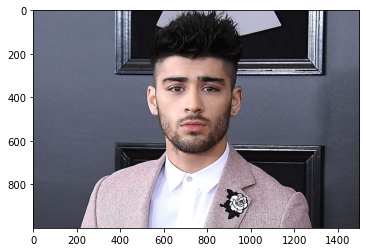

In [148]:
filename="images2.jpg"
img=read_file(filename)
org_img=np.copy(img)


In [149]:
def edge_mask(img,line_size,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    
    return edges

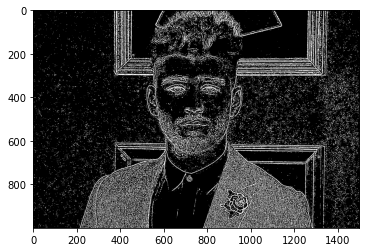

In [150]:
line_size,blur_value=5,3
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap='binary')
plt.show()

In [151]:
#REDUCE THE COLOR PALLETE 
def color_quantisation(img,k):
    #transform the image
    data=np.float32(img).reshape((-1,3))
    
    #determine the criteria
    criteria=(cv2.TERM_CRITERIA_EPS +cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    
    #implement the k means clustering 
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS )
    
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    
    return result

In [152]:
img=color_quantisation(img,k=9)


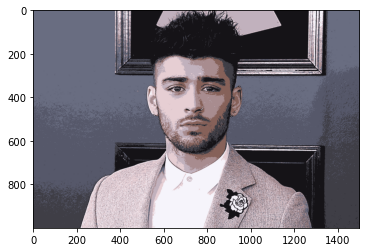

In [153]:
plt.imshow(img)
plt.show()

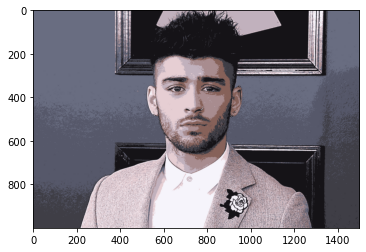

In [154]:
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)

plt.imshow(blurred)
plt.show()

In [155]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    
    plt.imshow(c)
    plt.title("CARTOON IMAGE")
    plt.show()
    plt.imshow(org_img)
    plt.title("ORIGINAL IMAGE")
    plt.show()

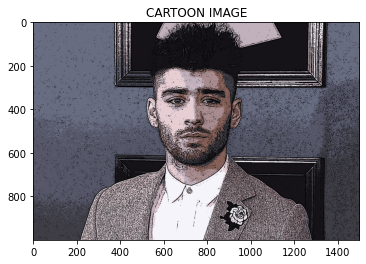

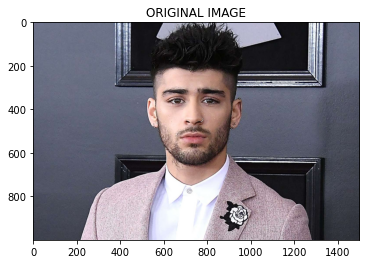

In [156]:
cartoon()